In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo 

In [26]:
# Load dataset

  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186)
  
# data (as pandas dataframes) 
X = wine_quality.data.features
y = np.array(wine_quality.data.targets).ravel()

# metadata 
#print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 



                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [61]:
X.describe()
print(min(y))
print(max(y))


3
9


In [58]:
#investigating the target
type(y)
np.unique(y)
target=pd.DataFrame(y, columns=["value"])
q1=target["value"].quantile(0.25)
q3=target["value"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

print(lower)
print(upper)

3.5
7.5


In [ ]:
#wine quality dateset using iqr

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [31]:
# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [32]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K-nearest neighbors

k: 1, Train/Test Score: 1.000/0.621
k: 3, Train/Test Score: 0.774/0.539
k: 5, Train/Test Score: 0.700/0.560
k: 7, Train/Test Score: 0.664/0.559
k: 9, Train/Test Score: 0.646/0.566
k: 11, Train/Test Score: 0.635/0.570
k: 13, Train/Test Score: 0.620/0.565
k: 15, Train/Test Score: 0.611/0.561
k: 17, Train/Test Score: 0.612/0.566
k: 19, Train/Test Score: 0.605/0.558


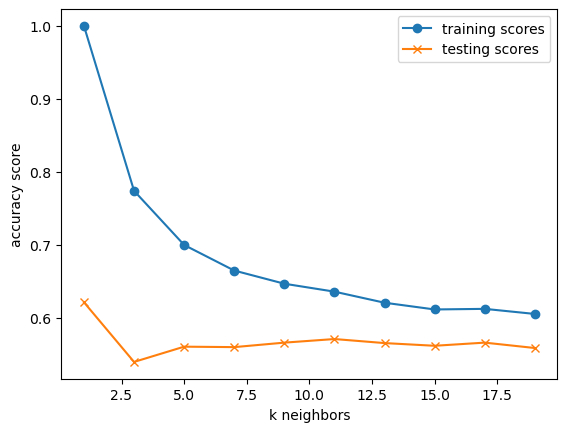

In [33]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [34]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Note that k: 11 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)

# Print the score for the test data.
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.570


In [49]:
#randomforest

rf_model=RandomForestClassifier(random_state=3, n_estimators=500)
rf_model.fit(X_train_scaled,y_train)
rf_y_pred=rf_model.predict(X_test_scaled)

print(rf_model.score(X_train_scaled, y_train))
print("-"*300)
print(rf_model.score(X_test_scaled, y_test))
print("-"*300)
print(balanced_accuracy_score(y_test,rf_y_pred))
print("-"*300)
print(classification_report(y_test,rf_y_pred))

1.0
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.6904615384615385
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.3800227840256597
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support



c:\Users\dclar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dclar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dclar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for idx in indices:
    print(f"Feature {idx}: {importances[idx]:.4f}")

Feature ranking:
Feature 10: 0.1247
Feature 7: 0.1016
Feature 1: 0.1000
Feature 6: 0.0926
Feature 5: 0.0877
Feature 4: 0.0873
Feature 9: 0.0844
Feature 3: 0.0840
Feature 8: 0.0832
Feature 2: 0.0791
Feature 0: 0.0754
